Pyloric Rhythm Similarity Criteria:
1. All three neurons oscillate
2. In every cycle (AB/PD start to next AD/PD start), LP begins before PY starts and ends before PY ends, AB/PD finishes before LP starts
3. Duty cycles (relative length of each burst to the total length of the cycle) are similar to experimental averages(Prinz et al., 2004)

In [4]:
pip install pathos --user


  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 81kB 2.8MB/s ta 0:00:011
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 71kB 3.4MB/s eta 0:00:01
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 112kB 3.3MB/s eta 0:00:01
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 92kB 3.7MB/s eta 0:00:01
  Cache entry deserialization failed, entry ignored
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.colors as colors
# from matplotlib import cm
import math
from CTRNNclass import *
from pyloricfitness import *
from SampleGenerators import *
from HPCTRNNevolution import *

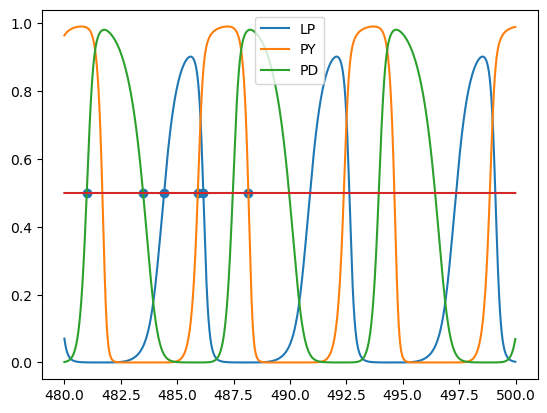

LP 48441 , 48615  PY 48591 , 48815  PD 48100 , 48348
LPdutycyclezscore  0.08361931207921834
PYdutycyclezscore  0.03308718300990307
PDdutycyclezscore  0.04231066460587407
LPstartphasezscore  0.11022382506153744
PYstartphasezscore  0.01478619268418339


17.9039491891357

In [2]:
# test adaptive CTRNN class
# weights = np.array([[6.60946,1.14559,-6.51152],[10.6385,1.19458,1.34445],[16,1.26722,1.663]])
# biases = np.array([-13.1741,-1.54257,-0.114027])
# timeconstants = np.array([9.42607,2.41159,7.85833])
# weights = np.transpose(np.array([4.24602, 11.8124 ,12.4259, -5.34179, -8.91089 ,7.77379 ,-10.0239, 0.799534, 6.90232]))
# biases = np.array([7.36221 ,-1.29373 ,-12.1857])
# timeconstants = np.array([1.78557, 1.30213 ,2])

# weights = np.reshape(np.array([8.01334, 11.5429 ,-3.46122, -12.5832 ,0.57023, -11.4816, 16, -6.79885, -8.07067]),(3,3))
# biases = np.array([-3.75806, -0.510943, 6.87966 ])
# timeconstants = np.array([1.09804 ,1.95277 ,1.1016])

weights = np.array([1.25966, 11.7919 ,-8.9466 ,-14.1082 ,13.505 ,15.8346, -4.73326 ,-14.9413, 7.13229])
biases = np.array([2.68606, -5.92321 ,-8.09309])
timeconstants = np.array([1.0782 ,1.45534 ,1.713])

neurongenome = np.concatenate((weights,biases,timeconstants),axis=None)
HPgenome = np.array([.25,.25,.25,.75,.75,.75,40,20,200])
duration = 500
dt = .01
C2 = CTRNN(3,dt,duration,HPgenome,neurongenome)
initial_states = np.array([3.,3.,3.])  #initial states of the neurons
C2.initializeState(initial_states)
C2.resetStepcount()
HPon = 0
for i in range(int(duration/dt)):
    C2.ctrnnstep(HPon)
plt.plot(C2.time[-2000:],C2.ctrnn_record[0,-2000:],label="LP")
plt.plot(C2.time[-2000:],C2.ctrnn_record[1,-2000:],label="PY")
plt.plot(C2.time[-2000:],C2.ctrnn_record[2,-2000:],label="PD")   
plt.plot(C2.time[-2000:],np.ones(2000)*.5)   
plt.scatter(np.array([48441 , 48615 , 48591 , 48815 , 48100 , 48348])*0.01,[.5,.5,.5,.5,.5,.5])
plt.legend()
plt.show()
#C2.plot()
#C2.plotparams()
pyloriclike(neurongenome,debugging=True)


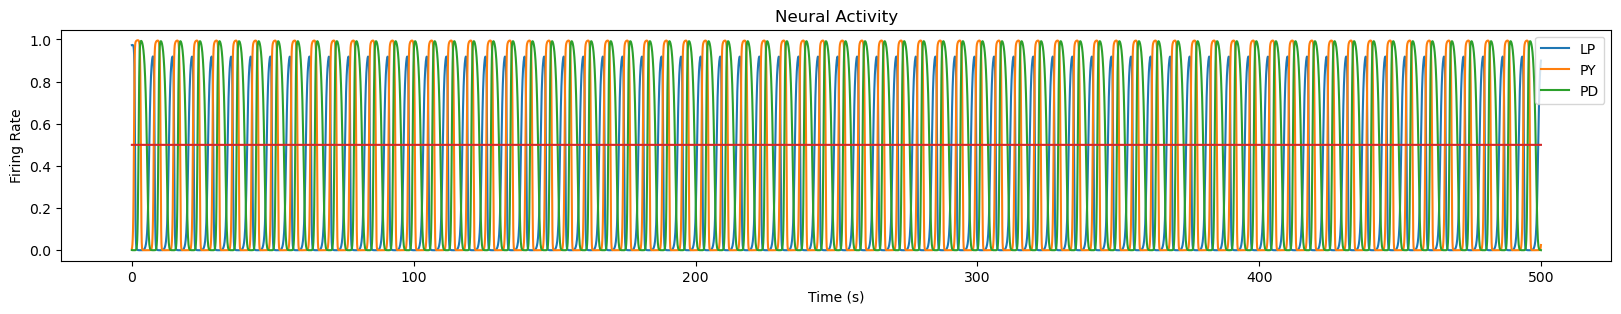

0.9023484058370775 2.147333957763615e-05
0.9911905985711437 3.932896090676792e-06
0.9815568659857314 6.0667142689414335e-05
New Pyloric fitness 17.6039491891357


In [4]:
HP = 0 

#test any CTRNN for pyloric fitness and plot
# weights = np.array([[13.47792516,  10.59233265, -15.04646692],[-15.97458819,   5.7376846,   -5.37480922],[-2.20731148, -11.07581759,  -3.1880527]])
# biases = np.array([-0.39843736, -6.68032731,  2.26812979])
# timeconstants = 1/np.array([0.14892103, 0.12300845, 0.25616658])

# weights = np.array([[-3.7789188,7.93029945,  1.36994916],[ -2.03197829,  9.41483729,  4.63459765],[ -6.44862027, -4.45381504, -1.80992267]])
# biases = np.array([ 5.43154491 ,-6.44566085, -2.35101064])
# timeconstants = 1/np.array([1.66586038 , 1.202376  ,  1.17894711])


#doubly periodic, how should I deal with them?
# weights = [[ 15.13420671 , 11.55247725, -12.01615767], [ -5.12504622, -16.72510022
#  , 15.59766673],[  15.21115945,   1.58408748 ,  1.22617987 ]] 
# biases = [-9.82697962,  -0.60614873  ,-1.96484597]   
# timeconstants = [1.13091869 ,  4.00518322  , 3.57617411]

neurongenome = np.concatenate((weights,biases,timeconstants),axis=None)
HPoffgenome = np.ones(2*3+3)
HPoffgenome[0:3] = 0
HPongenome = [.25,.25,.25,.75,.75,.75,40,20,1]
#print('Pyloric fitness',pyloriclike(neurongenome))
C1 = CTRNN(3,.1,500,HPongenome,neurongenome)
for i in range(len(C1.time)):        #run the CTRNN for the allotted duration
    C1.ctrnnstep(HP)
C1.plot()

print('New Pyloric fitness', pyloricfitness(neurongenome))

Microbial Evolutionary Algorithm

Ideally, for consistency with ALIFE paper, would have an elitism fraction of .1 instead of a tournament structure. Confirm this?

In [2]:
recombProb = 0
mutatProb = .1
generations = 50
popsize = 50

runs = 5

bestinds = np.zeros(runs)

#evolve for pyloric fitness *with* the generic HP mechanism ([.25,.75],40,20) applied to all neurons
for i in range(runs):
    print("Evolutionary Run ",i,":")
    CTRNNpop = randomCTRNNsample(3,popsize,center_crossing = True)  #seeding with center crossing networks
    M = MicrobialCTRNN(pyloriclikewithHP, CTRNNpop, recombProb, mutatProb, generations)
    M.run()
    bestinds[i] = M.save('Evolution%s'%i)

Evolutionary Run  0 :


KeyboardInterrupt: 

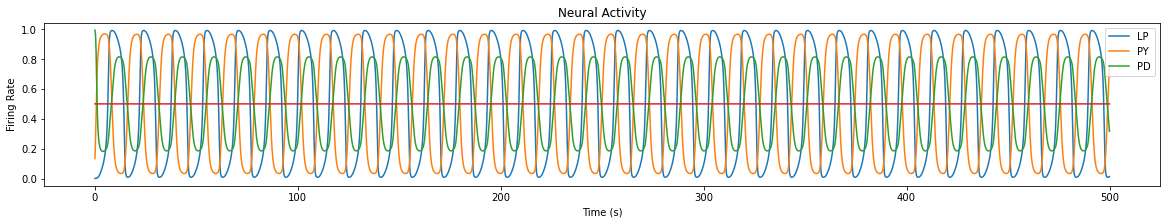

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


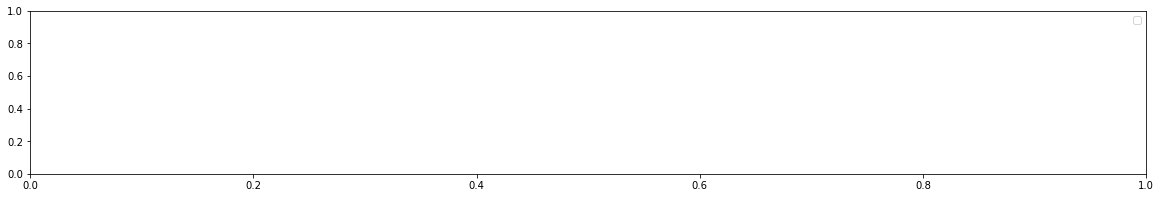

NameError: name 'bestinds' is not defined

In [5]:
CTRNNsize = 3
HP = 0 #HP on or off
HPgenome = np.ones(2*CTRNNsize+3)
HPgenome[0:CTRNNsize] = 0

runidx = 1
data = np.load('Evolution%s.npz'%runidx)
bestind = data['bestind']

C= CTRNN(3,.025,500,HPgenome,bestind)
for i in range(len(C.time)):        #run the CTRNN for the allotted duration
    C.ctrnnstep(HP)
C.plot()
#xvals = np.array([9934, 9948, 9958, 9966, 9958, 9974])-(np.ones(6)*(duration/dt)).astype(int)
#print(xvals[1])
#plt.scatter(xvals+200,(np.ones(6)*.5))
plt.legend()
plt.show()

print("Pyloric Fitness=", pyloriclike(bestinds[runidx])) #redundant to simulate twice but eh

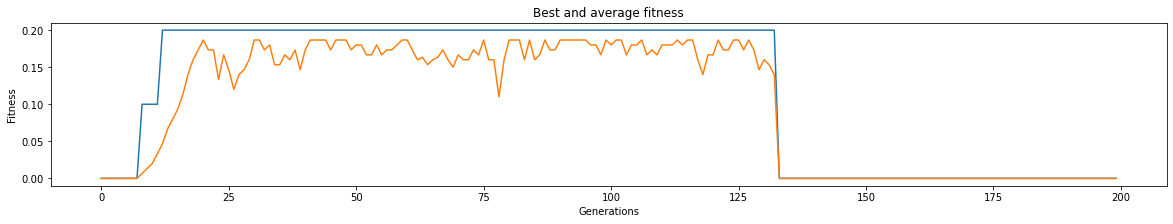

In [ ]:
for i in range(runs):
    data = np.load('Evolution%s.npz'%i)
    plt.plot(np.arange(generations),data['besthist'])
plt.title('Best Individuals Over Generations')
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

Local fitness landscape around one successful solution: sample fitness of solutions in a 15-D grid around the point 

    1. Which directions are the most "flexible"? - holding the other 14 parameters of the solution constant, which parameter has the steepest fitness dropoff? Which requires the least change before the rhythm is no longer pyloric-like at all?
    2. Visualize the local fitness landscape in several planes

In [6]:
#a = [14.82024187,  10.61253584] #original w11 and w12 of sol1
# sol1 = np.array([ 14.82024187,  10.61253584,-12.15141158,  -4.61967513,-15.81543225,  15.62745189,  14.71262429,   2.0523492 , 1.86045721, -10.25813196,  -0.29218389,  -2.47607644, 1.13091869,   4.00518322,   3.57617411])
#the original solution 1 used to make plots is apparently not quite pyloric under the fitness function anymore... don't know how it happened
# sol1 = 
# sol2 = np.array([13.47792516,  10.59233265, -15.04646692,-15.97458819,   5.7376846,   -5.37480922,-2.20731148, -11.07581759,  -3.1880527,-0.39843736, -6.68032731,  2.26812979,1/0.14892103, 1/0.12300845, 1/0.25616658])
#print(pyloriclike(sol1))
sol2 = neurongenome
print(pyloriclike(sol2))


17.9039491891357


In [7]:
dropoffs = np.zeros((15,2))
for dim in range(15):
    newsol = np.copy(sol2)
    fitness = pyloriclike(newsol)
    while fitness > .15:
        newsol[dim] += 2
        fitness = pyloriclike(newsol)
        #print(fitness)
    dropoffs[dim,1] = newsol[dim]
    newsol = np.copy(sol2)
    fitness = pyloriclike(newsol)
    while fitness > .15:
        newsol[dim] -= .5
        fitness = pyloriclike(newsol)
        #print(fitness)
    dropoffs[dim,0] = newsol[dim]

/Users/LJSbo/Documents/Put onto Mac/GitHub/PyloricCTRNNHomeostasis/CTRNNclass.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


In [1]:
dropoffssol1 = dropoffs
dropoffs[:,1]-dropoffs[:,0]
dropoffssol1

NameError: name 'dropoffs' is not defined

In [ ]:
print(widths)

[ 16  42  30   2  26  23  49  13   9  10   6   5  22   4 135]


In [ ]:
dim1lb = 6
dim1ub = 16
dim2lb = 6
dim2ub = 16
spacing = .1 #(must go evenly into both the interval widths)

#widthvals = np.array([0.8 , 2.1 , 1.5 , 0.1 , 1.3 , 1.2 , 2.45, 0.65, 0.45, 0.5 , 0.35, 0.3 , 1.15, 0.2 , 6.75])
#widths = widthvals/.01
#widths = widths.astype(int) + 1 #number of points spaced .05 apart on each dimension if the bookends are not pyloric-like

dim1 = 0 #index of par on x axis
dim2 = 1 #index par on y axis
fitnessgridsol1_2 = np.zeros((int((dim1ub-dim1lb)/spacing),int((dim2ub-dim2lb)/spacing)))#w21 vs b1
genome = np.copy(sol1)
genome[dim1] = dim1lb  #start the genome at the edge of both axes
for i in range(int((dim1ub-dim1lb)/spacing)):
    genome[dim2] = dim2lb 
    for j in range(int((dim2ub-dim2lb)/spacing)):
        fitnessgridsol1_2[i,j] = pyloriclike(genome,0)
        genome[dim2] += spacing       #and increment it with each loop
    genome[dim1] += spacing           
#print(fitnessgridsol1_1)

[ 14.2         14.         -12.15141158  -4.61967513 -15.81543225
  15.62745189  14.71262429   2.0523492    1.86045721 -10.25813196
  -0.29218389  -2.47607644   1.13091869   4.00518322   3.57617411]
possible double-periodicity
[ 14.4         14.         -12.15141158  -4.61967513 -15.81543225
  15.62745189  14.71262429   2.0523492    1.86045721 -10.25813196
  -0.29218389  -2.47607644   1.13091869   4.00518322   3.57617411]
possible double-periodicity


In [ ]:
fitnessgridsol1_2[0,0]

0.0

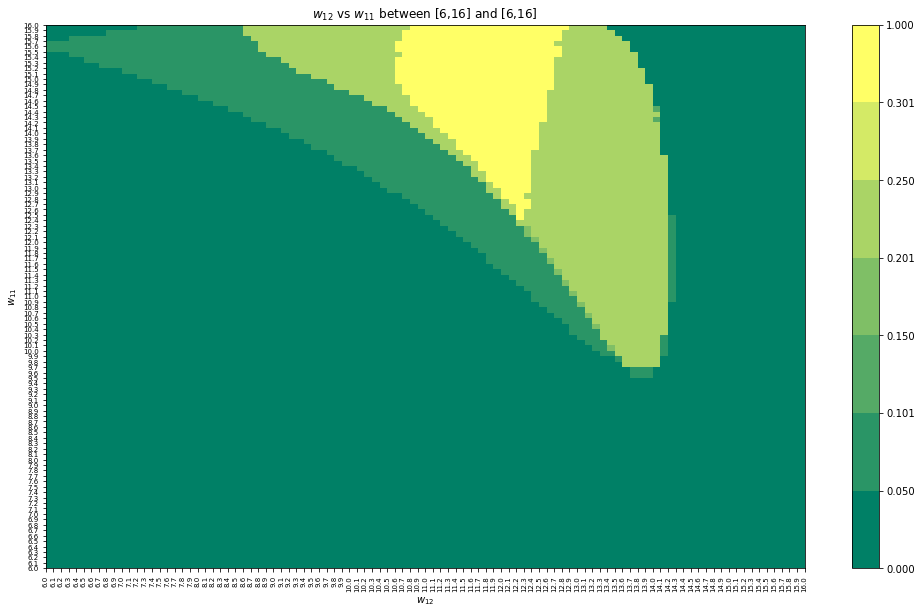

In [ ]:
cmap = cm.summer
fig, ax2 = plt.subplots(ncols=1)

#norm = colors.BoundaryNorm((0,.3,.6,.61,.62,.63,.64,.65,.66,.67,.68,.69,.7,.8,.9,1), ncolors=cmap.N, clip=True) #scaled to show extra pyloricness
norm = colors.BoundaryNorm((0,.0501,.101,.1501,.201,.2501,.301,1), ncolors=cmap.N, clip=True) #scaled to show oscillation and ordering


pc = ax2.pcolormesh(fitnessgridsol1_2, norm=norm, cmap=cmap)
fig.colorbar(pc, ax=ax2)
fig.set_figheight(10)
fig.set_figwidth(17)
ax2.set_title(r'$w_{12}$ vs $w_{11}$ between [6,16] and [6,16]')
ax2.set_ylabel(r'$w_{11}$')
ax2.set_xlabel(r'$w_{12}$')
xticks = np.arange(0,(int((dim2ub-dim2lb)/spacing))+1)
ax2.set_xticks(xticks)
xticklabels = np.round(np.arange(dim2lb,dim2ub+0.0001,spacing),3)
ax2.set_xticklabels(xticklabels,rotation = 90)
ax2.tick_params(axis='both', which='major', labelsize=7)
yticks = np.arange(0,(int((dim1ub-dim1lb)/spacing))+1)
ax2.set_yticks(yticks)
yticklabels = np.round(np.arange(dim1lb,dim1ub+0.0001,spacing),3)
ax2.set_yticklabels(yticklabels)

plt.show()

